# MOwNiT
## Laboratorium
### Całkowanie

In [1]:
using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)

([-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585], [0.12948496616886981, 0.2797053914892767, 0.38183005050511887, 0.41795918367346907, 0.38183005050511887, 0.2797053914892767, 0.12948496616886981])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [4]:
function legendre(k)
    if k == 0
        return Polynomial([1])
    end
    if k == 1
        return Polynomial([0,1])
    end
    
    return ((2 * k - 1)/(k))*Polynomial([0,1])*legendre(k - 1)-((k - 1)/k)*legendre(k - 2)
end

legendre (generic function with 1 method)

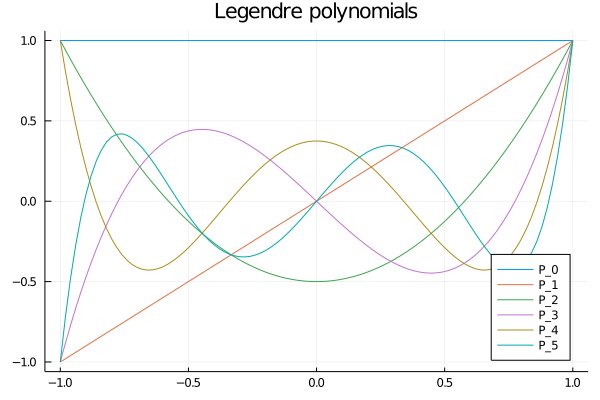

In [5]:
using Plots

p = plot(legendre(0),-1,1,label = "P_0", title = "Legendre polynomials", legend=:bottomright)

for k in 1:5
    plot!(legendre(k),-1,1, label = "P_"*string(k))
end
p

In [6]:
# P_1
# P_2
# P_3
for k in 2:4
    println("\n##################  k = ",k,"  ##################\n")
    (xp,a)=gauss(Float64,k)
    x = roots(legendre(k))
    xp = sort(xp)
    x = sort(x)
    
    for i in 1:length(xp)
        println("legendre: ", x[i])
        println("gauss   : ", xp[i])
        println()
    end
end


##################  k = 2  ##################

legendre: -0.5773502691896258
gauss   : -0.5773502691896258

legendre: 0.5773502691896256
gauss   : 0.5773502691896258


##################  k = 3  ##################

legendre: -0.7745966692414834
gauss   : -0.7745966692414834

legendre: 0.0
gauss   : 0.0

legendre: 0.7745966692414835
gauss   : 0.7745966692414834


##################  k = 4  ##################

legendre: -0.8611363115940536
gauss   : -0.8611363115940526

legendre: -0.33998104358485653
gauss   : -0.3399810435848563

legendre: 0.3399810435848563
gauss   : 0.3399810435848563

legendre: 0.8611363115940531
gauss   : 0.8611363115940526



### Związek z podstawowym twierdzeniem kwadratur Gaussa 

##### Podstawowe twierdzenie kwadratur Gaussa
Odcięte $x_i$ $n$ - punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $[a,b]$ są zerami wielomianu ortogonalnego $\varphi_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej.

##### Związek
Powyższa zbieżność wynika z tego, ze dla funkcji ważącej $w(x)=1$ wielomianem ortogonalnym jest wielomian Legendre'a.

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [7]:
function integral(f, k)
    (xp,a) = gauss(Float64,k)
    sum(a .* f.(xp)) 
end

integral (generic function with 1 method)

In [8]:
f(x) = x^2
integral(f,5)

0.6666666666666667

In [9]:
# test for given number of quadrature points (k)
# accurate for polynomials up to degree 2*k-1 

function test(k)
    print("\n###### Test for ",k, " quadrature points ######\n")
    for d in 1:2*k+2
        if d == 2*k
            println("---------------------------")
        end
        println("DEG",d)
        f(x) = x^d - x^(d-1)
        int = 1/(d+1) - (-1)^(d+1)/(d+1) - 1/d + (-1)^d/d
        println("acc: ", round(int,digits = 5))
        own = integral(f,k)
        println("own: ", round(own,digits = 5))
        
        err = abs((int - own)/int)*100
        println("ERROR: ",err," [%]\n")
    end
end
    

test (generic function with 1 method)

#### Test for 1 - 4 quadrature points
For given degree d $f(x) = x^d - x^{d-1}$

In [10]:
test(1)


###### Test for 1 quadrature points ######
DEG1
acc: -2.0
own: -2.0
ERROR: 0.0 [%]

---------------------------
DEG2
acc: 0.66667
own: 0.0
ERROR: 100.0 [%]

DEG3
acc: -0.66667
own: 0.0
ERROR: 100.0 [%]

DEG4
acc: 0.4
own: 0.0
ERROR: 100.0 [%]



In [11]:
test(2)


###### Test for 2 quadrature points ######
DEG1
acc: -2.0
own: -2.0
ERROR: 3.3306690738754696e-14 [%]

DEG2
acc: 0.66667
own: 0.66667
ERROR: 0.0 [%]

DEG3
acc: -0.66667
own: -0.66667
ERROR: 1.6653345369377348e-14 [%]

---------------------------
DEG4
acc: 0.4
own: 0.22222
ERROR: 44.44444444444443 [%]

DEG5
acc: -0.4
own: -0.22222
ERROR: 44.44444444444443 [%]

DEG6
acc: 0.28571
own: 0.07407
ERROR: 74.07407407407406 [%]



In [12]:
test(3)


###### Test for 3 quadrature points ######
DEG1
acc: -2.0
own: -2.0
ERROR: 2.220446049250313e-14 [%]

DEG2
acc: 0.66667
own: 0.66667
ERROR: 1.6653345369377348e-14 [%]

DEG3
acc: -0.66667
own: -0.66667
ERROR: 4.9960036108132044e-14 [%]

DEG4
acc: 0.4
own: 0.4
ERROR: 1.3877787807814457e-14 [%]

DEG5
acc: -0.4
own: -0.4
ERROR: 2.7755575615628914e-14 [%]

---------------------------
DEG6
acc: 0.28571
own: 0.24
ERROR: 15.99999999999996 [%]

DEG7
acc: -0.28571
own: -0.24
ERROR: 15.99999999999996 [%]

DEG8
acc: 0.22222
own: 0.144
ERROR: 35.19999999999997 [%]



In [13]:
test(4)


###### Test for 4 quadrature points ######
DEG1
acc: -2.0
own: -2.0
ERROR: 0.0 [%]

DEG2
acc: 0.66667
own: 0.66667
ERROR: 1.6653345369377348e-14 [%]

DEG3
acc: -0.66667
own: -0.66667
ERROR: 3.3306690738754696e-14 [%]

DEG4
acc: 0.4
own: 0.4
ERROR: 4.163336342344337e-14 [%]

DEG5
acc: -0.4
own: -0.4
ERROR: 4.163336342344337e-14 [%]

DEG6
acc: 0.28571
own: 0.28571
ERROR: 3.885780586188048e-14 [%]

DEG7
acc: -0.28571
own: -0.28571
ERROR: 3.885780586188048e-14 [%]

---------------------------
DEG8
acc: 0.22222
own: 0.21061
ERROR: 5.224489795918312 [%]

DEG9
acc: -0.22222
own: -0.21061
ERROR: 5.224489795918312 [%]

DEG10
acc: 0.18182
own: 0.15603
ERROR: 14.180758017492684 [%]



#### Stopień dokładności kwadratury:
Stopień dokładności kwadratury to liczba całkowita $n>0$ taka, że kwadratura jest dokładna dla wielomianów stopnia $\leq n$ oraz daje niezerowy błąd dla wielomianów stopnia $>n$.
#### Twierdzenie o stopniu dokładności kwadratury Gaussa:
Kwadratura ma stopień dokładności $2n−1$ (dla $n$ - punktowej kwadratury).

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [14]:
function integral2(f,k,a,b)
    g(z) = f((b + a)/2 + (b - a) * z/2)*(b - a)/2
    return integral(g,k)
end

integral2 (generic function with 1 method)

### Test 

$\int_{-10}^{10} (x^5 - x^4 - x^3) dx = -40000$

In [15]:
f(x) = x^5 - x^4 - x^3
integral2(f,3,-10,10)

-40000.0

$\int_{-\pi}^{2\pi}sin(x)dx = -2$

In [16]:
integral2(sin, 20, -pi, 2*pi)

-2.000000000000003

$\int_{-100}^{-50} \frac{1}{x}dx = -0.69315$

In [17]:
f(x) = 1/x
integral2(f,3,-100,-50)

-0.693121693121693

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

$\int_{-10}^{10} (x^5 - x^4 - x^3) dx = -40000$

In [18]:
# quadgk() returns a pair (I,E)
# I - estimated integral
# E - estimated upper bound on the absolute error

f(x) = x^5 - x^4 - x^3
(I,E) = quadgk(f,-10,10)
I

-40000.00000000016

$\int_{-\pi}^{2\pi}sin(x)dx = -2$

In [19]:
(I,E) = quadgk(sin, -pi, 2*pi)
I

-1.9999999999999996

$ \int_{-\infty}^{\infty}  \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})dx = 1$

In [20]:
f(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
(I,E) = quadgk(f,-Inf,+Inf)
I

1.0000000000032583

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie, 
w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

### Trapezoidal Method Algorithm
$\int_{a}^{b} f(x)dx \approx T_n = \frac{\Delta x}{2} \sum_{i=1}^{N}  (f(x_{i}) + f(x_{i-1})) = \frac{\Delta x}{2}[f(x_{0}) + 2f(x_{1}) + 2f(x_{2}) + ... + 2f(x_{n-1}) + f(x_{n})]$

$\Delta x = \frac{b - a}{N}$ - length of the subintervals

$x_{i} = a + i\cdot \Delta x$

In [21]:
function integral_t(f,a,b,N)
    delta_x = (b - a)/N
    sum = f(a)
    for i in 1:N-1
        sum += 2 * f(a + i * delta_x)
    end
    sum += f(a + N * delta_x)
    return sum * delta_x/2
end

integral_t (generic function with 1 method)

In [22]:
f(x) = x^5 - x^4 - x^3
integral_t(f,-10,10,50)

-40106.64959999989

### 1. Exponential function
$ f(x) = e^x $

$ \int_{-10}^{3} e^xdx \approx 20.085 $

In [23]:
f(x) = exp(x)

f (generic function with 1 method)

In [24]:
int = 20.085

x = 1:40
err = Float64[]

for N in x
    own = integral_t(f,-10,3,N)
    e = abs((int - own)/int)*100
    push!(err,e)
end

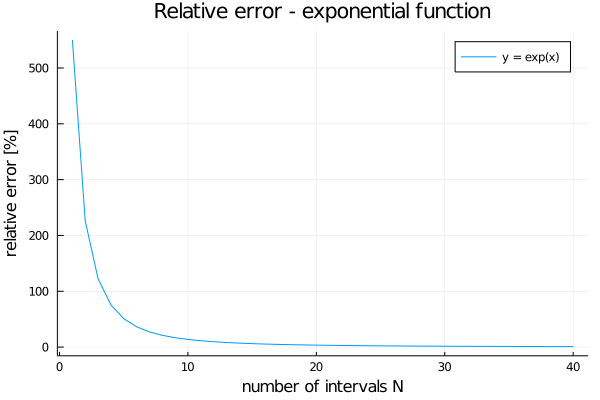

In [25]:
plot(x,err,title = "Relative error - exponential function", 
    xlabel = "number of intervals N", ylabel = "relative error [%]", label = "y = exp(x)")

### 2. Trigonometric function
$ f(x) = sin(x)$

$ \int_{0}^{3\pi} sin(x) = 2$

In [26]:
f(x) = sin(x)

f (generic function with 1 method)

In [27]:
int = 2

x = 2:40
err = Float64[]

for N in x
    own = integral_t(f,0,3*pi,N)
    e = abs((int - own)/int)*100
    push!(err,e)
end

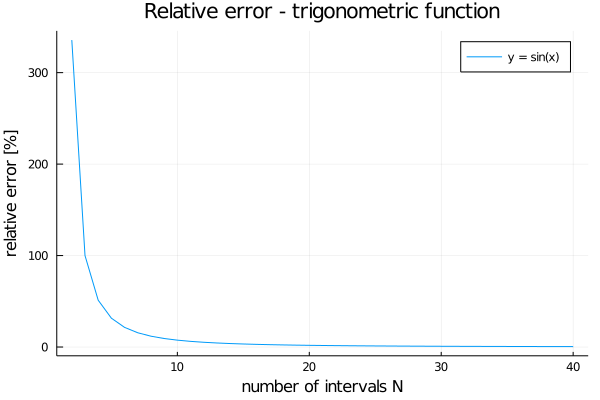

In [28]:
plot(x,err,title = "Relative error - trigonometric function", 
    xlabel = "number of intervals N", ylabel = "relative error [%]", label = "y = sin(x)")